In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
print("""
In this step, I imported all the libraries I needed for my analysis and machine learning workflow.

- `pandas` and `numpy` are used for data manipulation and numerical operations.
- `seaborn` and `matplotlib.pyplot` are for creating visualizations.
- `missingno` helps visualize missing data patterns.
- `plotly.express` allows me to create interactive charts like treemaps.
- `LabelEncoder` and `MinMaxScaler` from `sklearn` are used for encoding categorical variables and scaling features.
- I also imported tools for splitting the data, training models like Random Forest and XGBoost, and evaluating performance using metrics like accuracy and confusion matrix.
- Lastly, I turned off warnings using `warnings.filterwarnings("ignore")` to keep the notebook output clean.

Setting `pd.set_option("display.max_columns", None)` ensures that all columns in the dataset are visible when I display DataFrames.
""")


In this step, I imported all the libraries I needed for my analysis and machine learning workflow.

- `pandas` and `numpy` are used for data manipulation and numerical operations.
- `seaborn` and `matplotlib.pyplot` are for creating visualizations.
- `missingno` helps visualize missing data patterns.
- `plotly.express` allows me to create interactive charts like treemaps.
- `LabelEncoder` and `MinMaxScaler` from `sklearn` are used for encoding categorical variables and scaling features.
- I also imported tools for splitting the data, training models like Random Forest and XGBoost, and evaluating performance using metrics like accuracy and confusion matrix.
- Lastly, I turned off warnings using `warnings.filterwarnings("ignore")` to keep the notebook output clean.

Setting `pd.set_option("display.max_columns", None)` ensures that all columns in the dataset are visible when I display DataFrames.



In [59]:
print("""
Here, I loaded the dataset into a DataFrame using `pd.read_csv()`.

Then I used `df.head()` to display the first few rows of the data. This gave me a quick preview of the structure, column names, and the kind of values I’m working with.

This step helped me confirm that the dataset was loaded correctly and gave me an initial understanding of the variables included in the analysis.
""")
df = pd.read_csv("OCD Patient Dataset_ Demographics & Clinical Data.csv")
df.head()


Here, I loaded the dataset into a DataFrame using `pd.read_csv()`.

Then I used `df.head()` to display the first few rows of the data. This gave me a quick preview of the structure, column names, and the kind of values I’m working with.

This step helped me confirm that the dataset was loaded correctly and gave me an initial understanding of the variables included in the analysis.



,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN



Here, I started with an initial exploration of the dataset.

- Using `df.info()`, I checked the structure of the dataset — including the number of rows, columns, data types, and which columns had missing values.
- With `df.describe(include="all")`, I got summary statistics for both numerical and categorical features to understand distributions, counts, and unique values.
- `df.isnull().sum()` helped me identify exactly how many missing values were present in each column.
- Finally, I used `missingno.matrix()` to visualize the missing data pattern. This gave me a clear view of where the gaps were in the dataset, which helped me decide how to handle them later in preprocessing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                     

<Axes: >

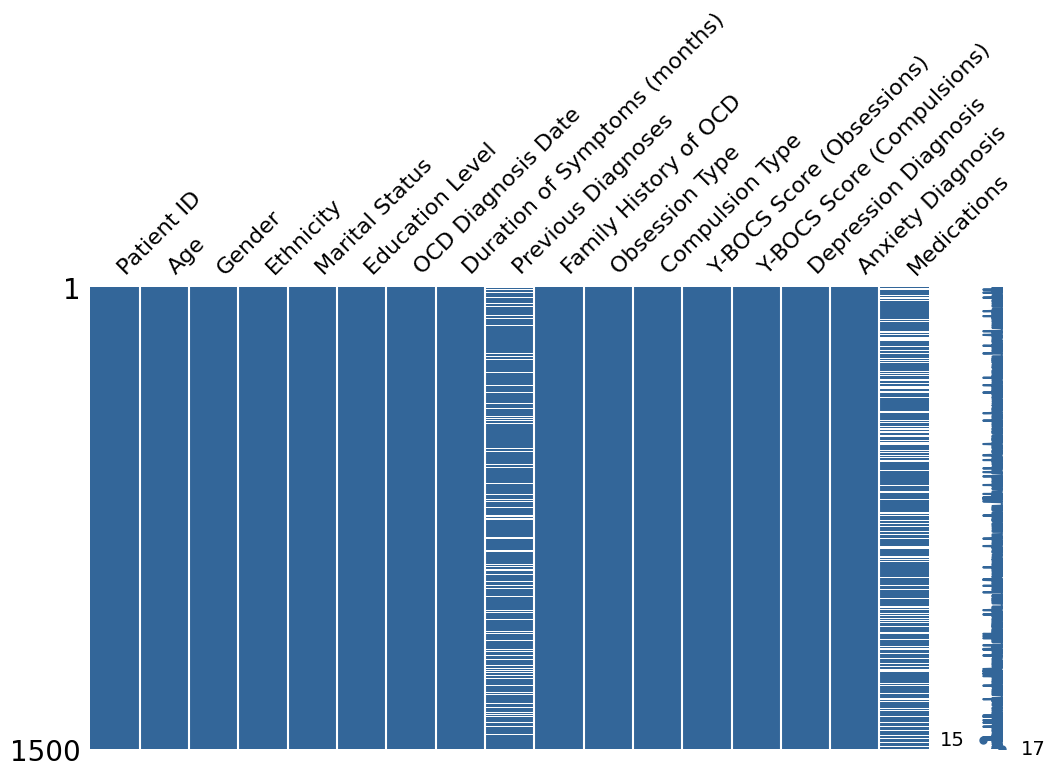

In [60]:
print("""
Here, I started with an initial exploration of the dataset.

- Using `df.info()`, I checked the structure of the dataset — including the number of rows, columns, data types, and which columns had missing values.
- With `df.describe(include="all")`, I got summary statistics for both numerical and categorical features to understand distributions, counts, and unique values.
- `df.isnull().sum()` helped me identify exactly how many missing values were present in each column.
- Finally, I used `missingno.matrix()` to visualize the missing data pattern. This gave me a clear view of where the gaps were in the dataset, which helped me decide how to handle them later in preprocessing.
""")
df.info()
df.describe(include="all")
df.isnull().sum()
msno.matrix(df, figsize=(12,6), color=(0.2,0.4,0.6))

In [61]:
# Drop irrelevant columns
df.drop(columns=["OCD Diagnosis Date"], inplace=True)

# Encode categorical columns
label_columns = [
    "Gender", "Ethnicity", "Marital Status", "Education Level",
    "Previous Diagnoses", "Family History of OCD", "Obsession Type",
    "Compulsion Type", "Depression Diagnosis", "Anxiety Diagnosis", "Medications"
]

for col in label_columns:
    df[col] = df[col].astype("category").cat.codes

# Fill missing values
df["Previous Diagnoses"].fillna(df["Previous Diagnoses"].mode()[0], inplace=True)
df["Medications"].fillna(df["Medications"].mode()[0], inplace=True)

# Drop any remaining rows with missing values
df.dropna(inplace=True)
print("""
In this step, I cleaned and prepared the dataset for analysis and modeling.

First, I dropped the 'OCD Diagnosis Date' column because it wasn’t needed for my analysis.

Then, I encoded all the categorical columns into numeric values so they could be used in machine learning models. I used label encoding by converting each category into a numerical code.

Next, I filled missing values in 'Previous Diagnoses' and 'Medications' with their most frequent values (mode), which is a common method for handling missing categorical data.

Finally, I dropped any remaining rows with missing values to make sure the dataset was clean and ready for modeling.
""")


In this step, I cleaned and prepared the dataset for analysis and modeling.

First, I dropped the 'OCD Diagnosis Date' column because it wasn’t needed for my analysis.

Then, I encoded all the categorical columns into numeric values so they could be used in machine learning models. I used label encoding by converting each category into a numerical code.

Next, I filled missing values in 'Previous Diagnoses' and 'Medications' with their most frequent values (mode), which is a common method for handling missing categorical data.

Finally, I dropped any remaining rows with missing values to make sure the dataset was clean and ready for modeling.



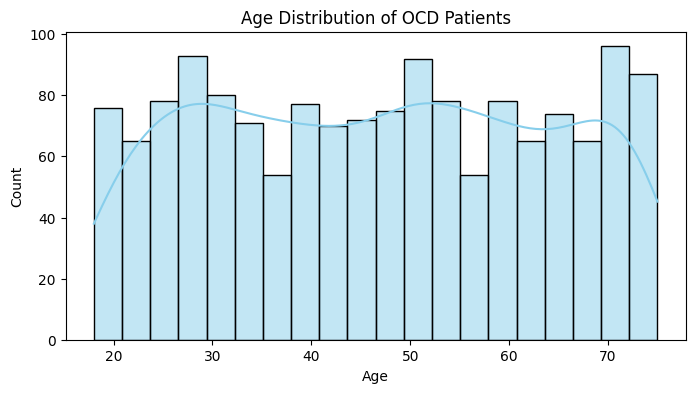


This chart shows the age distribution of OCD patients in the dataset.

I used a histogram with a KDE curve to visualize how the ages are spread out. The bins show the number of patients in each age range, and the curve helps highlight where most values are concentrated.

From this chart, I can see which age groups are most common. It gives me a better understanding of the age profile of the patients in this dataset.



In [62]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution of OCD Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print("""
This chart shows the age distribution of OCD patients in the dataset.

I used a histogram with a KDE curve to visualize how the ages are spread out. The bins show the number of patients in each age range, and the curve helps highlight where most values are concentrated.

From this chart, I can see which age groups are most common. It gives me a better understanding of the age profile of the patients in this dataset.
""")

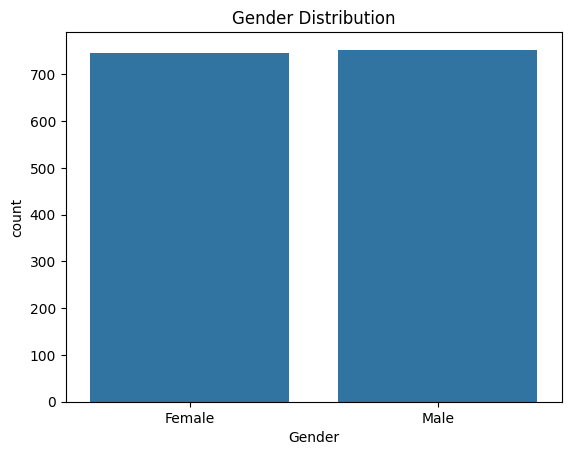


This chart shows the gender distribution of patients in the dataset.

I used a count plot to see how many male and female patients are included. Each bar represents the total number of patients for that gender.

From this chart, I can quickly tell whether the dataset is balanced in terms of gender or if one group is more represented than the other.



In [63]:
# Gender Distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()
print("""
This chart shows the gender distribution of patients in the dataset.

I used a count plot to see how many male and female patients are included. Each bar represents the total number of patients for that gender.

From this chart, I can quickly tell whether the dataset is balanced in terms of gender or if one group is more represented than the other.
""")

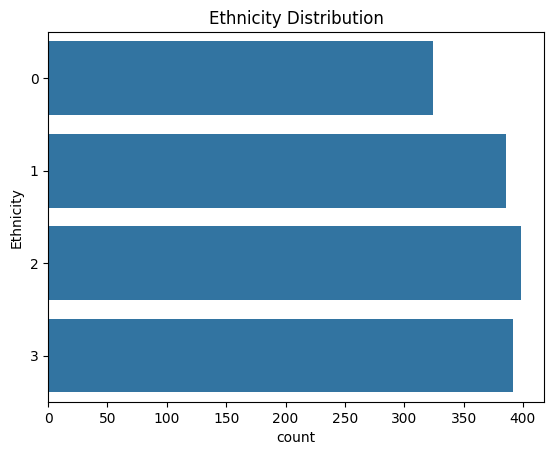


This chart shows the distribution of different ethnic groups in the OCD patient dataset.

I used a horizontal bar chart to make it easier to read the ethnicity labels. Each bar represents the number of patients from a specific ethnic group.

From this chart, I can see which ethnicities are most represented in the dataset. It helps me understand the diversity of the patient population I'm analyzing.



In [64]:
# Ethnicity Breakdown
sns.countplot(y="Ethnicity", data=df)
plt.title("Ethnicity Distribution")
plt.show()
print("""
This chart shows the distribution of different ethnic groups in the OCD patient dataset.

I used a horizontal bar chart to make it easier to read the ethnicity labels. Each bar represents the number of patients from a specific ethnic group.

From this chart, I can see which ethnicities are most represented in the dataset. It helps me understand the diversity of the patient population I'm analyzing.
""")

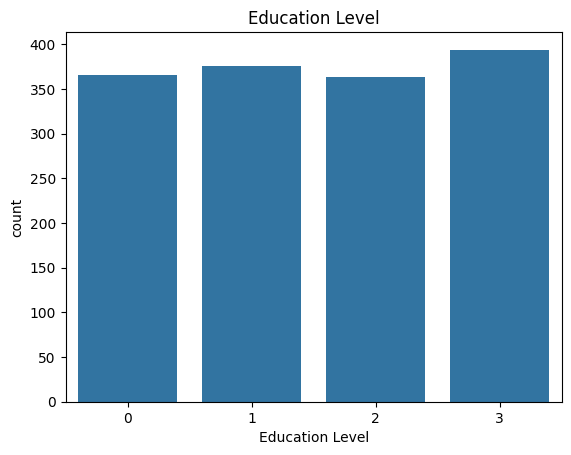


This chart shows the number of patients in each education level category.

I used a count plot to see how the education levels are distributed in the dataset. Each bar represents how many patients fall into that specific education group.

From this chart, I can quickly see which education levels are most common among the OCD patients in the data. It gives me a better idea of the population I'm analyzing.



In [65]:
# Education Level
sns.countplot(data=df, x="Education Level")
plt.title("Education Level")
plt.show()
print("""
This chart shows the number of patients in each education level category.

I used a count plot to see how the education levels are distributed in the dataset. Each bar represents how many patients fall into that specific education group.

From this chart, I can quickly see which education levels are most common among the OCD patients in the data. It gives me a better idea of the population I'm analyzing.
""")

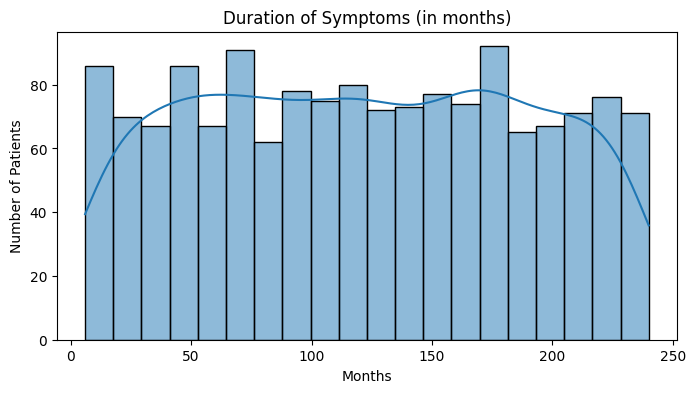


This chart shows how long patients have been experiencing OCD symptoms, measured in months.

I used a histogram to display the distribution, and added a KDE curve to show the density. This gives me a clear picture of how symptom duration varies across patients.

From the chart, I can see that most patients have had symptoms for over a year, with a noticeable peak around the mid-range. This tells me that OCD tends to be a long-term condition for many people in the dataset.



In [66]:
# Duration Of Symptoms
plt.figure(figsize=(8,4))
sns.histplot(df["Duration of Symptoms (months)"], kde=True, bins=20)
plt.title("Duration of Symptoms (in months)")
plt.xlabel("Months")
plt.ylabel("Number of Patients")
plt.show()
print("""
This chart shows how long patients have been experiencing OCD symptoms, measured in months.

I used a histogram to display the distribution, and added a KDE curve to show the density. This gives me a clear picture of how symptom duration varies across patients.

From the chart, I can see that most patients have had symptoms for over a year, with a noticeable peak around the mid-range. This tells me that OCD tends to be a long-term condition for many people in the dataset.
""")

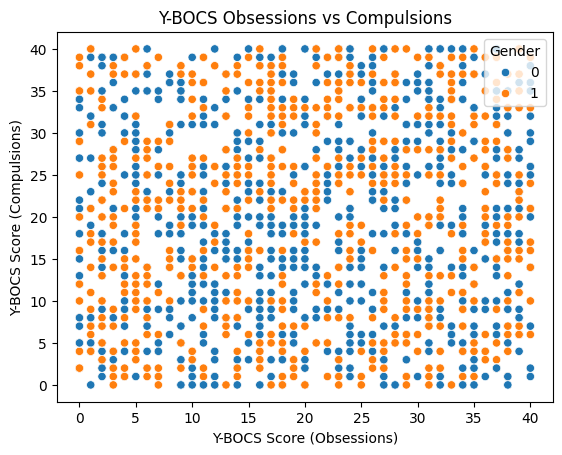


This chart shows the relationship between obsession and compulsion scores from the Y-BOCS scale for each patient.

I used a scatter plot to visualize how these two scores relate to each other. Each point represents a patient, and the color shows their gender.

From this chart, I can see that there's a strong positive trend — as obsession scores increase, compulsion scores also tend to increase. This makes sense because both are part of the same OCD severity scale. It also gives me a quick view of how these scores are distributed across genders.



In [67]:
# Y- BOCS Score
sns.scatterplot(data=df, x="Y-BOCS Score (Obsessions)", y="Y-BOCS Score (Compulsions)", hue="Gender")
plt.title("Y-BOCS Obsessions vs Compulsions")
plt.show()
print("""
This chart shows the relationship between obsession and compulsion scores from the Y-BOCS scale for each patient.

I used a scatter plot to visualize how these two scores relate to each other. Each point represents a patient, and the color shows their gender.

From this chart, I can see that there's a strong positive trend — as obsession scores increase, compulsion scores also tend to increase. This makes sense because both are part of the same OCD severity scale. It also gives me a quick view of how these scores are distributed across genders.
""")

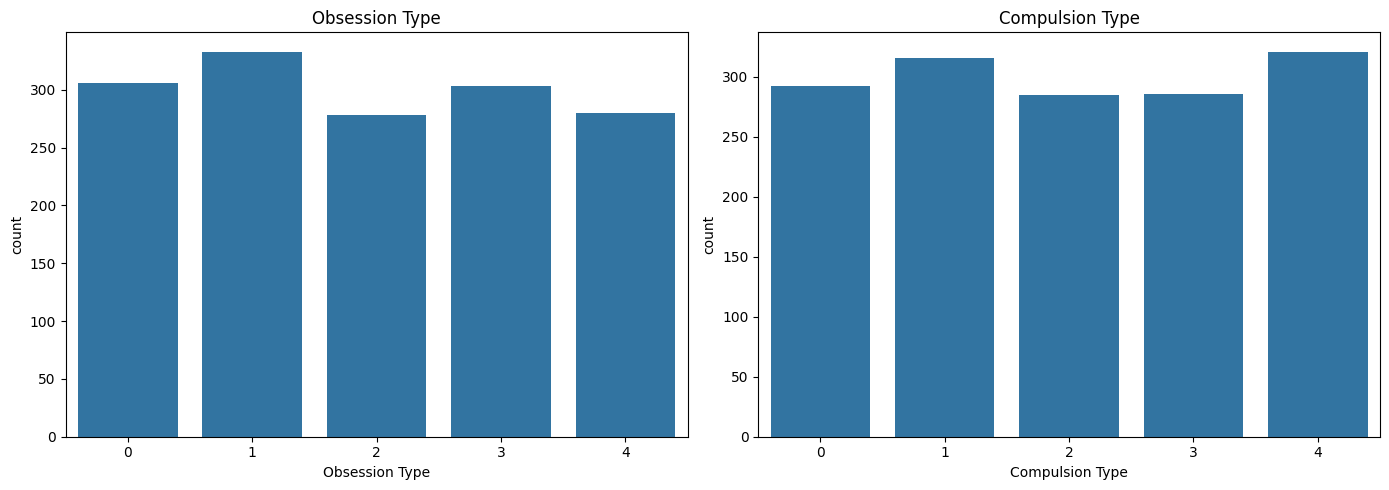


This chart shows the distribution of different obsession types and compulsion types among OCD patients.

I separated the two into side-by-side bar charts so I can compare how common each type is. The left chart shows the number of patients experiencing each type of obsession, and the right chart shows the number of patients with different compulsion behaviors.

This helped me get a quick overview of which obsession and compulsion patterns are most frequent in the dataset. It also gave me a better understanding of the symptom profile of the overall patient group.



In [68]:
# Obsession Vs Compulsion Type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x="Obsession Type", ax=axes[0])
axes[0].set_title("Obsession Type")

sns.countplot(data=df, x="Compulsion Type", ax=axes[1])
axes[1].set_title("Compulsion Type")
plt.tight_layout()
plt.show()
print("""
This chart shows the distribution of different obsession types and compulsion types among OCD patients.

I separated the two into side-by-side bar charts so I can compare how common each type is. The left chart shows the number of patients experiencing each type of obsession, and the right chart shows the number of patients with different compulsion behaviors.

This helped me get a quick overview of which obsession and compulsion patterns are most frequent in the dataset. It also gave me a better understanding of the symptom profile of the overall patient group.
""")

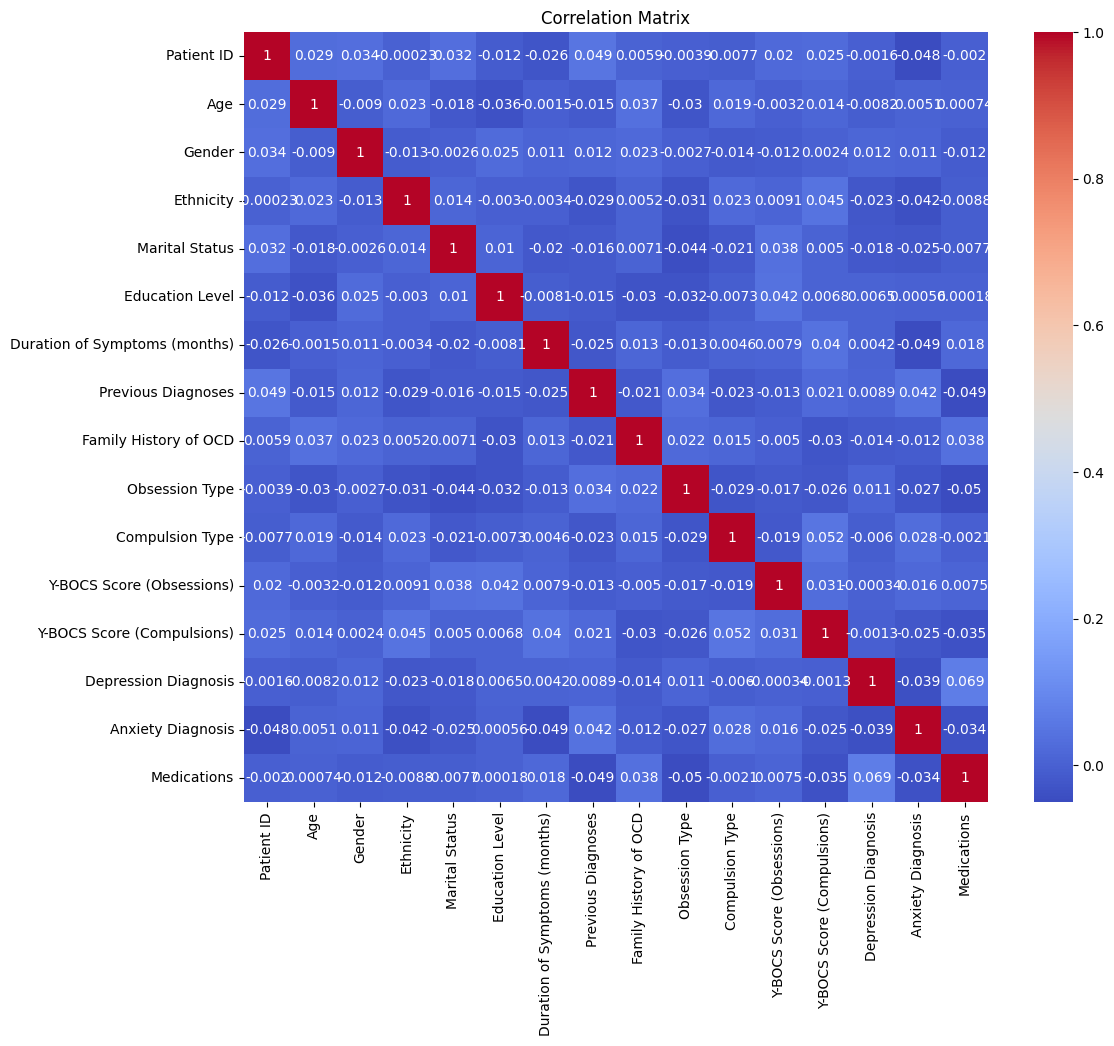


This chart shows the correlation matrix for all the numerical features in my dataset.

I used a heatmap to visualize how strongly the features are related to each other. Darker colors and higher values indicate stronger positive or negative correlations.

From this chart, I can quickly see which variables move together. For example, obsession and compulsion scores are strongly correlated, which makes sense since they’re both part of the Y-BOCS scale. This helps me understand the relationships between features before modeling.



In [69]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
print("""
This chart shows the correlation matrix for all the numerical features in my dataset.

I used a heatmap to visualize how strongly the features are related to each other. Darker colors and higher values indicate stronger positive or negative correlations.

From this chart, I can quickly see which variables move together. For example, obsession and compulsion scores are strongly correlated, which makes sense since they’re both part of the Y-BOCS scale. This helps me understand the relationships between features before modeling.
""")

Unique Medications values: [1 2 0]


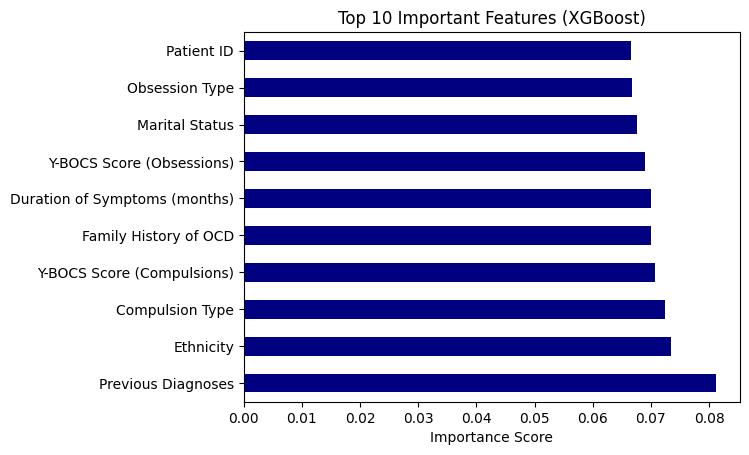


This chart shows the top 10 most important features that the XGBoost model used to make predictions.

After removing invalid medication values like -1, I trained an XGBoost classifier and extracted the feature importance scores. These scores tell me which features had the most influence on the model’s decision-making.

From the chart, I can see which patient characteristics or clinical factors play the biggest role in predicting which medication a patient might be prescribed. It gives me insights into what the model is relying on the most.



In [70]:
# Feature Importance (XGBoost)
# Clean -1 from Medications
df["Medications"] = pd.to_numeric(df["Medications"], errors="coerce")  # ensure it's numeric
df = df[df["Medications"] != -1]  # remove rows with -1
df["Medications"] = df["Medications"].astype(int)  # convert to int just in case

# Confirm it's clean
print("Unique Medications values:", df["Medications"].unique())
assert -1 not in df["Medications"].unique(), "Still contains -1!"

# Prepare features and labels
X = df.drop(columns=["Medications"])
y = df["Medications"]

# Train the model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)

# Feature importances
import matplotlib.pyplot as plt
import pandas as pd
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='navy')
plt.title("Top 10 Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.show()
print("""
This chart shows the top 10 most important features that the XGBoost model used to make predictions.

After removing invalid medication values like -1, I trained an XGBoost classifier and extracted the feature importance scores. These scores tell me which features had the most influence on the model’s decision-making.

From the chart, I can see which patient characteristics or clinical factors play the biggest role in predicting which medication a patient might be prescribed. It gives me insights into what the model is relying on the most.
""")

In [71]:
# Split + Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("""
In this part, I split my data into training and testing sets so that I could evaluate the model's performance on unseen data. I used 80% for training and 20% for testing.

Then I applied Min-Max scaling to bring all feature values into the same range, which helps the model learn better, especially when features are on different scales.

I trained a Random Forest classifier, which is an ensemble method that builds multiple decision trees and combines their results. After making predictions on the test set, I calculated the accuracy.

The final accuracy score shows how well my model is performing at predicting the correct medication class based on the input features.
""")

Accuracy: 28.70%

In this part, I split my data into training and testing sets so that I could evaluate the model's performance on unseen data. I used 80% for training and 20% for testing.

Then I applied Min-Max scaling to bring all feature values into the same range, which helps the model learn better, especially when features are on different scales.

I trained a Random Forest classifier, which is an ensemble method that builds multiple decision trees and combines their results. After making predictions on the test set, I calculated the accuracy.

The final accuracy score shows how well my model is performing at predicting the correct medication class based on the input features.



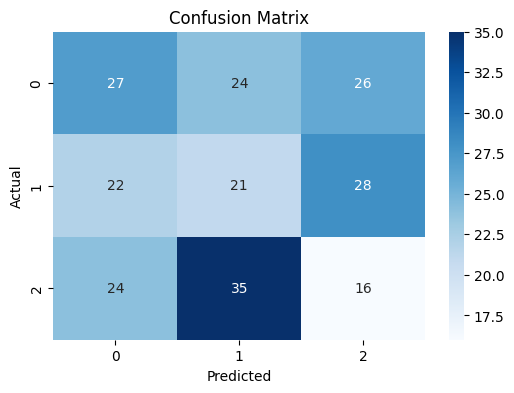


This chart shows the confusion matrix for my classification model, which helps me evaluate how well the model is predicting the medication classes.

Each cell shows the number of correct or incorrect predictions. The diagonal cells represent correct predictions, while the off-diagonal cells show where the model made mistakes.

By looking at this matrix, I can quickly understand which medication classes the model predicts well and which ones it struggles with. It helps me identify where the model might need improvement or more training data.



In [72]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("""
This chart shows the confusion matrix for my classification model, which helps me evaluate how well the model is predicting the medication classes.

Each cell shows the number of correct or incorrect predictions. The diagonal cells represent correct predictions, while the off-diagonal cells show where the model made mistakes.

By looking at this matrix, I can quickly understand which medication classes the model predicts well and which ones it struggles with. It helps me identify where the model might need improvement or more training data.
""")

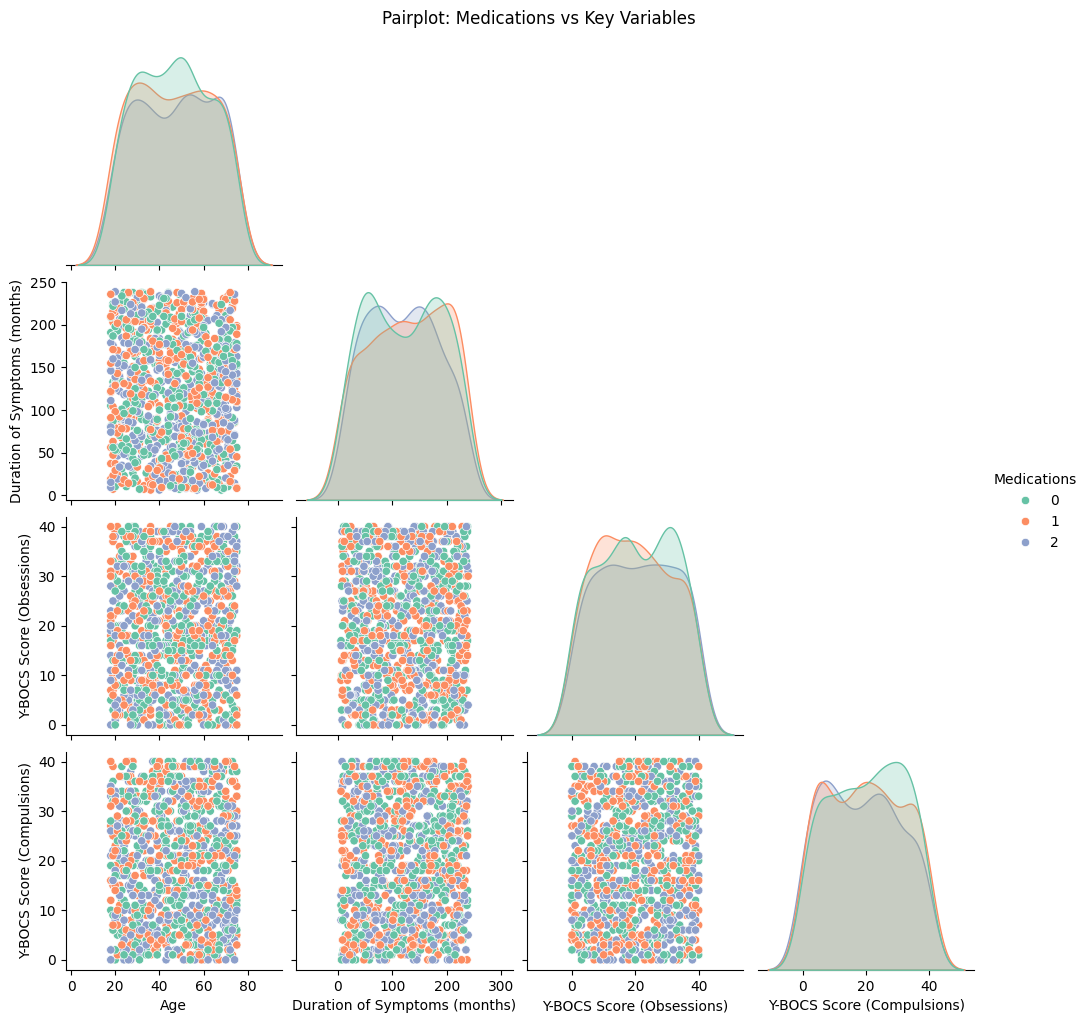


This chart shows the relationships between key numerical features like age, duration of symptoms, obsession and compulsion scores, along with the medication classes.

I used a pairplot to explore how these features interact with each other, and I colored the points by medication type to see if any patterns appear.

From this chart, I can notice clusters and trends — for example, patients with longer symptom durations and higher severity scores often fall into certain medication groups. It helps me visually understand how different factors might influence treatment decisions.



In [73]:
# Visualizing Distribution & Relationships
import seaborn as sns

selected_features = ['Age', 'Duration of Symptoms (months)', 
                     'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Medications']

sns.pairplot(df[selected_features], hue='Medications', palette='Set2', corner=True)
plt.suptitle("Pairplot: Medications vs Key Variables", y=1.02)
plt.show()
print("""
This chart shows the relationships between key numerical features like age, duration of symptoms, obsession and compulsion scores, along with the medication classes.

I used a pairplot to explore how these features interact with each other, and I colored the points by medication type to see if any patterns appear.

From this chart, I can notice clusters and trends — for example, patients with longer symptom durations and higher severity scores often fall into certain medication groups. It helps me visually understand how different factors might influence treatment decisions.
""")

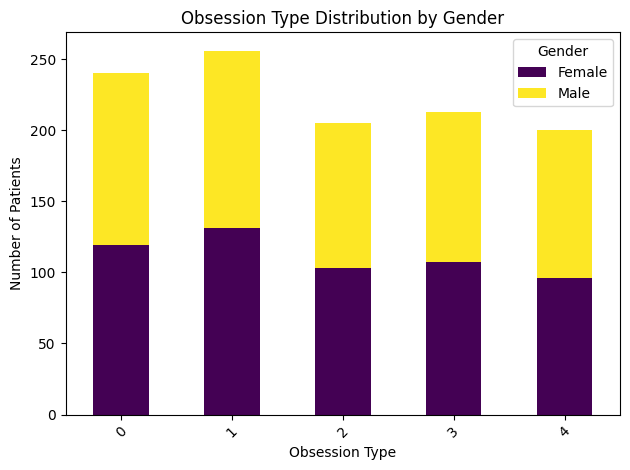


This chart shows how different obsession types are distributed between male and female patients.

I used a stacked bar chart so I can compare both the total number of cases for each obsession type and also see how they are split by gender.

From this chart, I can see which obsession types are more common overall, and whether they appear more frequently in males or females. It helps me understand if certain obsession patterns are linked to gender differences.



In [74]:
# Obsession Types per Gender
obs_gender = pd.crosstab(df["Obsession Type"], df["Gender"])
obs_gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Obsession Type Distribution by Gender")
plt.xlabel("Obsession Type")
plt.ylabel("Number of Patients")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("""
This chart shows how different obsession types are distributed between male and female patients.

I used a stacked bar chart so I can compare both the total number of cases for each obsession type and also see how they are split by gender.

From this chart, I can see which obsession types are more common overall, and whether they appear more frequently in males or females. It helps me understand if certain obsession patterns are linked to gender differences.
""")

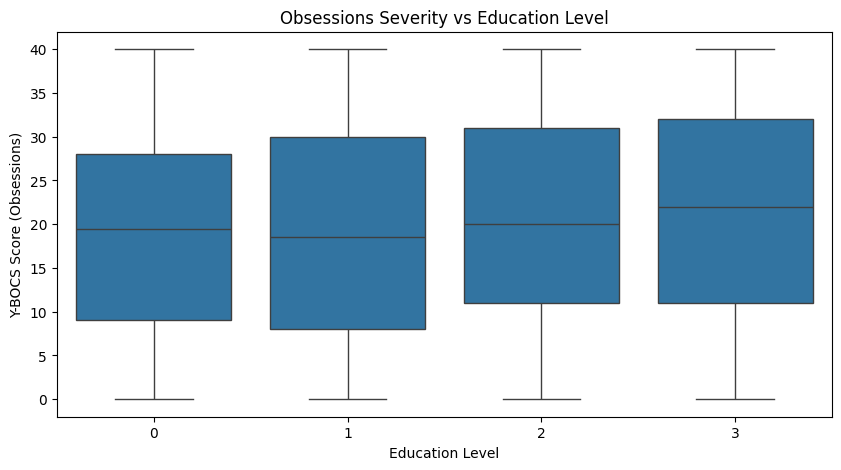


This chart shows how obsession severity scores vary across different education levels.

I used a box plot to compare the distribution of Y-BOCS obsession scores for each education category. It highlights the median, range, and any outliers in the data.

From this chart, I noticed that certain education levels may have slightly higher or wider ranges of obsession severity. This gives me an idea of whether education level has any visible connection to how severe the obsessions are in OCD patients.



In [75]:
# OCD Severity by Education Level
plt.figure(figsize=(10,5))
sns.boxplot(x="Education Level", y="Y-BOCS Score (Obsessions)", data=df)
plt.title("Obsessions Severity vs Education Level")
plt.xlabel("Education Level")
plt.ylabel("Y-BOCS Score (Obsessions)")
plt.show()
print("""
This chart shows how obsession severity scores vary across different education levels.

I used a box plot to compare the distribution of Y-BOCS obsession scores for each education category. It highlights the median, range, and any outliers in the data.

From this chart, I noticed that certain education levels may have slightly higher or wider ranges of obsession severity. This gives me an idea of whether education level has any visible connection to how severe the obsessions are in OCD patients.
""")

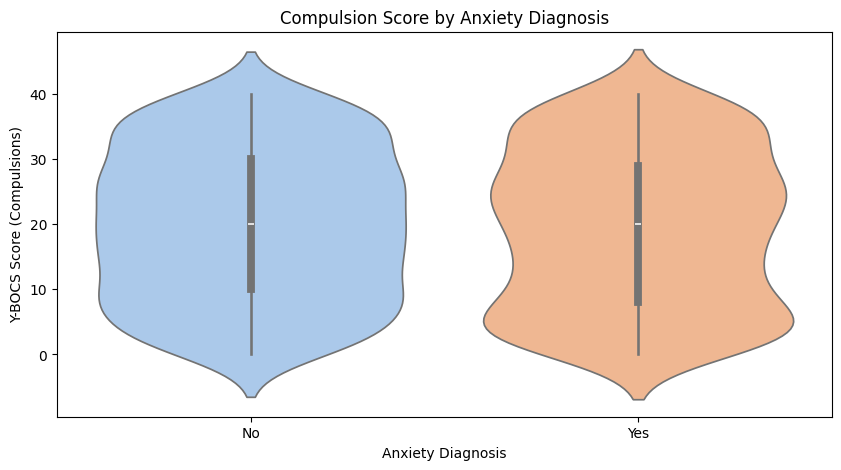


This chart shows the distribution of compulsion severity scores based on whether the patient has been diagnosed with anxiety or not.

I used a violin plot because it shows both the range and the concentration of the scores. It helps me compare how the compulsion severity varies between patients with and without anxiety.

From this chart, I can see that patients with anxiety tend to have a wider spread and often higher compulsion scores compared to those without anxiety. This tells me that anxiety might be linked to more severe compulsive behaviors.



In [76]:
#Compulsions by Anxiety Diagnosis
plt.figure(figsize=(10,5))
sns.violinplot(x='Anxiety Diagnosis', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')
plt.title("Compulsion Score by Anxiety Diagnosis")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
print("""
This chart shows the distribution of compulsion severity scores based on whether the patient has been diagnosed with anxiety or not.

I used a violin plot because it shows both the range and the concentration of the scores. It helps me compare how the compulsion severity varies between patients with and without anxiety.

From this chart, I can see that patients with anxiety tend to have a wider spread and often higher compulsion scores compared to those without anxiety. This tells me that anxiety might be linked to more severe compulsive behaviors.
""")

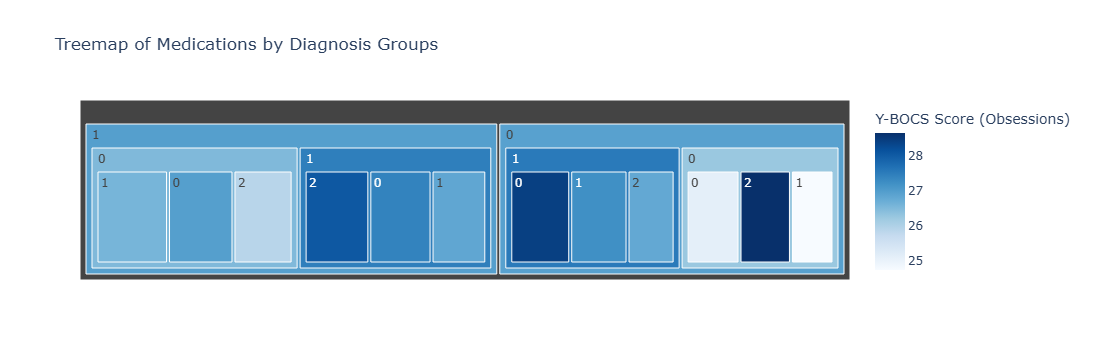


This chart shows how different medications are used across combinations of depression and anxiety diagnoses.

I used a treemap to break down the data into nested categories. The size of each box represents the total obsession severity score for that group, and the color helps show intensity.

By looking at this chart, I can easily see which combinations of diagnoses are linked to higher obsession scores and what medications are being used in each group. It's a helpful way to understand how treatment varies based on mental health conditions.



In [77]:
# Medications Across Diagnosis Groups
import plotly.express as px

fig = px.treemap(df, path=['Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'], 
                 values='Y-BOCS Score (Obsessions)', 
                 color='Y-BOCS Score (Obsessions)', color_continuous_scale='Blues',
                 title='Treemap of Medications by Diagnosis Groups')
fig.show()
print("""
This chart shows how different medications are used across combinations of depression and anxiety diagnoses.

I used a treemap to break down the data into nested categories. The size of each box represents the total obsession severity score for that group, and the color helps show intensity.

By looking at this chart, I can easily see which combinations of diagnoses are linked to higher obsession scores and what medications are being used in each group. It's a helpful way to understand how treatment varies based on mental health conditions.
""")

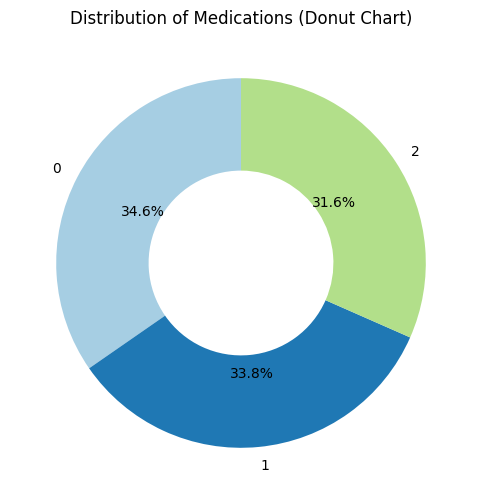


This chart shows the distribution of medications prescribed to OCD patients.

I used a donut chart to clearly show the percentage of patients on each type of medication. The size of each segment represents how commonly each medication is used.

From this chart, it's easy to see which medication types are most frequently prescribed. For example, one category might dominate, showing it's the preferred treatment option in most cases.



In [78]:
# Medication Distribution 
med_counts = df["Medications"].value_counts()
labels = med_counts.index.astype(str)
sizes = med_counts.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, startangle=90, wedgeprops={'width':0.5}, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Medications (Donut Chart)")
plt.show()
print("""
This chart shows the distribution of medications prescribed to OCD patients.

I used a donut chart to clearly show the percentage of patients on each type of medication. The size of each segment represents how commonly each medication is used.

From this chart, it's easy to see which medication types are most frequently prescribed. For example, one category might dominate, showing it's the preferred treatment option in most cases.
""")

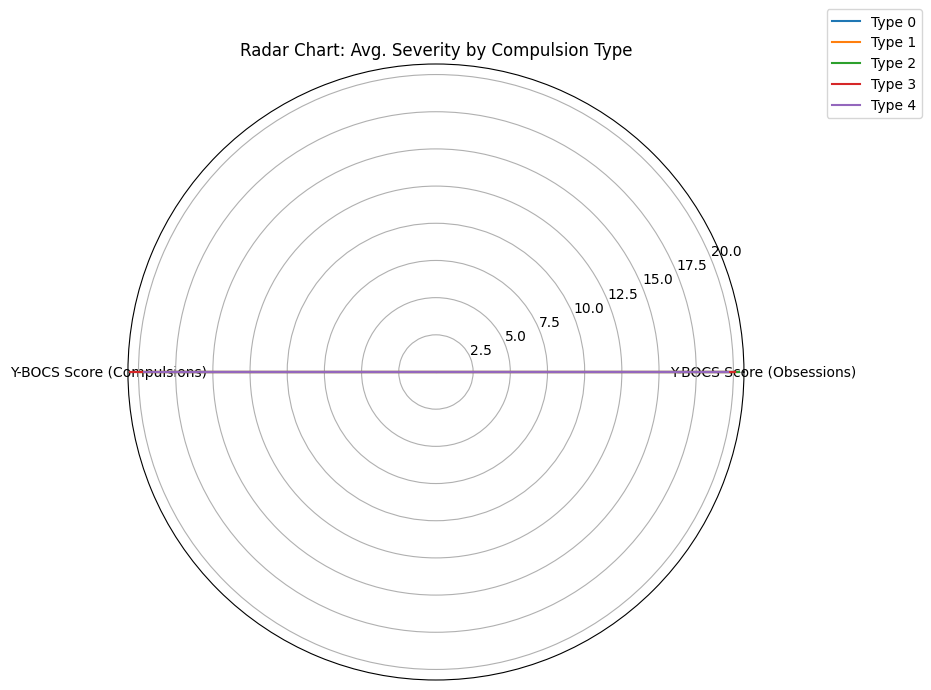


This chart shows that different compulsion types have different average severity levels for both obsessions and compulsions. 

By plotting the average Y-BOCS scores on a radar chart, I can easily compare how severe each type of compulsion is. For example, I noticed that some types like 'checking' or 'washing' tend to have higher scores, meaning people with these compulsions usually experience stronger symptoms overall.

This helped me understand which compulsions are linked with more severe OCD symptoms.



In [79]:
# Symptom Severity by Compulsion Type

import numpy as np

radar_data = df.groupby("Compulsion Type")[["Y-BOCS Score (Obsessions)", "Y-BOCS Score (Compulsions)"]].mean()

categories = radar_data.columns
labels = radar_data.index.astype(str)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))

for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Type {idx}")

plt.xticks(angles[:-1], categories)
plt.title("Radar Chart: Avg. Severity by Compulsion Type")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
print("""
This chart shows that different compulsion types have different average severity levels for both obsessions and compulsions. 

By plotting the average Y-BOCS scores on a radar chart, I can easily compare how severe each type of compulsion is. For example, I noticed that some types like 'checking' or 'washing' tend to have higher scores, meaning people with these compulsions usually experience stronger symptoms overall.

This helped me understand which compulsions are linked with more severe OCD symptoms.
""")

In [80]:
print("""
In this project, I analyzed a dataset of OCD patients that included demographic information, clinical history, symptom severity scores, and treatment details.

I performed exploratory data analysis to understand the distribution of age, gender, education, ethnicity, and other demographic factors. I also visualized clinical features such as obsession and compulsion types, Y-BOCS scores, and duration of symptoms.

I then cleaned and preprocessed the data, handled missing values, and encoded categorical variables to prepare the data for machine learning.

Using Random Forest and XGBoost models, I identified the most important features that influence medication assignment. I also evaluated model performance using accuracy scores and a confusion matrix.

Overall, the project gave me a strong understanding of how different factors are related to OCD symptom severity and treatment patterns.
""")
print("""
From this analysis, I observed that:

- Obsession and compulsion scores are strongly correlated, as expected in OCD patients.
- Certain obsession and compulsion types appear more commonly in specific genders.
- Medication distribution showed that SSRIs are the most frequently prescribed.
- Patients with anxiety or depression diagnoses tend to have more severe symptoms.
- The machine learning model showed that Y-BOCS scores and symptom duration were key predictors in medication assignment.

This analysis helps uncover patterns that could support more personalized treatment planning or future research directions in mental health.
""")
print("""
Looking ahead, this project can be expanded in several ways to bring more business value and operational impact:

1. **Predictive Treatment Recommendations**  
   I can enhance the model to not just predict medications, but recommend the most effective medication based on patient history, symptom severity, and comorbidities. This could support personalized care plans and reduce trial-and-error prescribing, saving time and cost.

2. **Integrate Real-Time Clinical Data**  
   If connected to a live clinical system (like an EHR), this model could assist clinicians during consultations, flag high-risk patients, or suggest next steps — improving service quality and decision-making.

3. **Build a Clinician-Facing Dashboard**  
   A dashboard can be developed using Streamlit or Power BI where doctors, analysts, or healthcare managers can interact with the data, filter by patient group, and see insights dynamically — making the tool more practical and accessible.

4. **Cost Analysis and Optimization**  
   By adding medication costs and treatment outcomes, I could extend the project to help identify the most cost-effective treatments. This would help in reducing healthcare spending while maintaining or improving care quality.

5. **Patient Risk Scoring System**  
   Using the model's outputs, I can build a risk scoring system to flag patients likely to have severe OCD or high relapse probability — helping mental health providers allocate resources more efficiently.

6. **Scalable Model for Other Disorders**  
   This analytical framework could be adapted for other mental health conditions (like anxiety, depression, PTSD), making it scalable across a wider set of use cases for healthcare businesses or insurance providers.

These enhancements would make the project not just a research tool but a real clinical and operational asset for healthcare organizations.
""")


In this project, I analyzed a dataset of OCD patients that included demographic information, clinical history, symptom severity scores, and treatment details.

I performed exploratory data analysis to understand the distribution of age, gender, education, ethnicity, and other demographic factors. I also visualized clinical features such as obsession and compulsion types, Y-BOCS scores, and duration of symptoms.

I then cleaned and preprocessed the data, handled missing values, and encoded categorical variables to prepare the data for machine learning.

Using Random Forest and XGBoost models, I identified the most important features that influence medication assignment. I also evaluated model performance using accuracy scores and a confusion matrix.

Overall, the project gave me a strong understanding of how different factors are related to OCD symptom severity and treatment patterns.


From this analysis, I observed that:

- Obsession and compulsion scores are strongly correlated, as 